In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import *

In [3]:
FILEPATH = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/Trustadvisor_Playground/reviews.csv"
df = pd.read_csv(FILEPATH, index_col=0)
df.head()

,titles,ratings,reviews,dates,replies,reply_dates
0,Mais ou est ma commande???,1,"Commande N° 609249735,toujours non livrée,pass...",2023-02-07T17:39:04.000Z,"Bonjour, nous vous informons que nous avons pr...",2023-02-08T09:48:06.000Z
1,Cela fait plusieurs semaines même plus…,1,Magasin de Carrefour Trans en Provence 83\nCel...,2023-02-06T14:48:53.000Z,NaN,NaN
2,Commande Deliveroo annulé !,1,Commande Deliveroo passé ce jour sans suite ca...,2023-02-08T10:54:56.000Z,"Bonjour, nous vous remercions pour cette infor...",2023-02-08T12:59:53.000Z
3,une honte cette société qu'utilise…,1,une honte cette société qu'utilise Carrefour p...,2023-02-04T18:29:49.000Z,"Bonjour, pourriez-vous nous communiquer votre ...",2023-02-05T08:17:54.000Z
4,Tout se passe bien chez Carrefour City…,1,Tout se passe bien chez Carrefour City sauf po...,2023-02-05T11:41:45.000Z,"Bonjour, pouvez-vous nous préciser quel magasi...",2023-02-04T16:18:10.000Z


In [4]:
df.shape

(2000, 6)

In [5]:
clean_df = remove_and_combined(df,
                    title_col='titles',
                    review_col='reviews')
# clean_df.to_csv('clean_df.csv')

## Plot some data visualizations

In [6]:
df['combined_reviews'].str.split().apply(len).mean()

100.3715

### Plot the `count of words by its length`

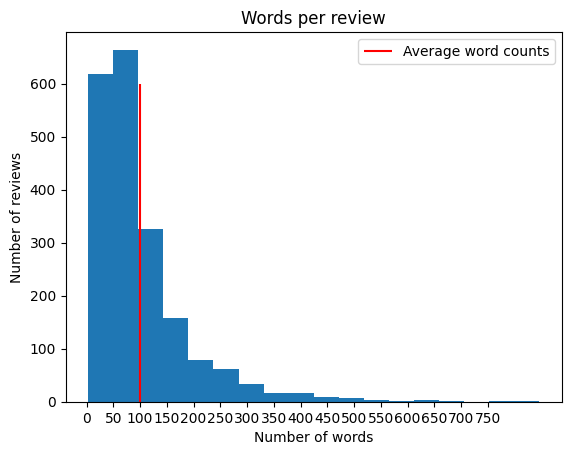

In [7]:
df['combined_reviews'].str.split().apply(len).hist(grid=False, bins=18)
plt.vlines(x = df['combined_reviews'].str.split().apply(len).mean(), 
           ymin=0, ymax=600, color='red', label='Average word counts')
plt.title('Words per review')
plt.xlabel('Number of words')
plt.xticks(np.arange(0,800, 50))
plt.ylabel('Number of reviews')
plt.legend()

### plot the boxplot of word lenght groupby star reviews

In [8]:
df['reviews_len']  = df['combined_reviews'].str.split().apply(len)
df.head()

,titles,ratings,reviews,dates,replies,reply_dates,clean_review,combined_reviews,reviews_len
0,Mais ou est ma commande???,1,"Commande N° 609249735,toujours non livrée,pass...",2023-02-07T17:39:04.000Z,"Bonjour, nous vous informons que nous avons pr...",2023-02-08T09:48:06.000Z,"Commande N° 609249735,toujours non livrée,pass...",Mais ou est ma commande??? Commande N° 6092497...,45
1,Cela fait plusieurs semaines même plus…,1,Magasin de Carrefour Trans en Provence 83\nCel...,2023-02-06T14:48:53.000Z,NaN,NaN,Magasin de Carrefour Trans en Provence 83Cela ...,Cela fait plusieurs semaines même plus… Magasi...,63
2,Commande Deliveroo annulé !,1,Commande Deliveroo passé ce jour sans suite ca...,2023-02-08T10:54:56.000Z,"Bonjour, nous vous remercions pour cette infor...",2023-02-08T12:59:53.000Z,Commande Deliveroo passé ce jour sans suite ca...,Commande Deliveroo annulé ! Commande Deliveroo...,97
3,une honte cette société qu'utilise…,1,une honte cette société qu'utilise Carrefour p...,2023-02-04T18:29:49.000Z,"Bonjour, pourriez-vous nous communiquer votre ...",2023-02-05T08:17:54.000Z,une honte cette société qu'utilise Carrefour p...,une honte cette société qu'utilise… une honte ...,86
4,Tout se passe bien chez Carrefour City…,1,Tout se passe bien chez Carrefour City sauf po...,2023-02-05T11:41:45.000Z,"Bonjour, pouvez-vous nous préciser quel magasi...",2023-02-04T16:18:10.000Z,Tout se passe bien chez Carrefour City sauf po...,Tout se passe bien chez Carrefour City… Tout s...,84


In [9]:
clean_df.groupby('ratings').aggregate({'combined_reviews' : ['count'],
                                       'reviews_len': ['mean', 'max', 'std']})

combined_reviews reviews_len                
                   count        mean  max        std
ratings                                             
1                   1551  107.676338  846  94.389370
2                    145   96.524138  599  88.235251
3                     82   71.670732  397  72.185299
4                     70   81.171429  640  97.099825
5                    152   53.828947  316  52.218057

<AxesSubplot: xlabel='ratings', ylabel='reviews_len'>

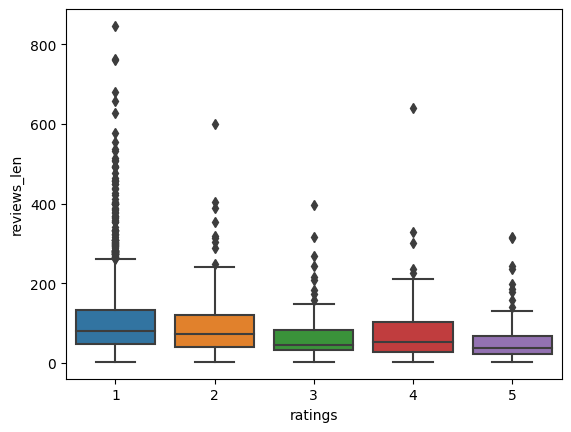

In [10]:
sns.boxplot(data=clean_df,
            x = 'ratings',
            y = 'reviews_len')

In [11]:
sht = clean_df[clean_df['ratings'] == 5].index
np.random.choice(sht, size = 200, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [13]:
clean_df[clean_df['ratings'].isin( [3,5])].shape

(234, 9)

To make sure we have the reviews sample from diffent star ratings, we loop through the dataframe and extract index to create demo sample size. As we see the hugely imbalanced dataset toward 1-star review, we limit the number of review from that classs to 200, and for other 2 - 5 star classes, we keep all the reviews because each class has less than 150 reviews

In [14]:
n_per_rating = 200
selected_idx = []
for star in range(1,6):
    print(f'rating: {star}')
    print(clean_df[clean_df['ratings'] == star].shape)
    if star == 1:
        np.random.seed(42)
        index_list = clean_df[clean_df['ratings'] == star].index
        index = np.random.choice(a = index_list,
                        size = n_per_rating,
                        replace=False)
        print(len(index))
        selected_idx.extend(index)
        print()
        
    else:
        index_list = clean_df[clean_df['ratings'] == star].index
        selected_idx.extend(index_list)
        print(len(selected_idx))
        print()
    

rating: 1
(1551, 9)
200

rating: 2
(145, 9)
345

rating: 3
(82, 9)
427

rating: 4
(70, 9)
497

rating: 5
(152, 9)
649



In [15]:
len(selected_idx)

649

In [17]:
selected_df = clean_df.iloc[selected_idx, :]
selected_df.shape
# selected_df.to_csv('selected_df.csv')

---

# Call the pre-trained model

In [99]:
import torch
from transformers import AutoModel, AutoTokenizer

In [152]:
modelname = 'flaubert/flaubert_base_cased'
flaubert_model = AutoModel.from_pretrained(modelname)
flaubert_tokenizer = AutoTokenizer.from_pretrained(modelname,
                                                   max_length = 512)

Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [153]:
sample_text = "Je parle pas bien francais"
token_ids = torch.tensor([flaubert_tokenizer.encode(sample_text,)])
print(token_ids, len(token_ids[0]))

tensor([[    0,   107,  1029,    42,    83, 28454,     1]]) 7


In [154]:
# torch.Size([1, 8, 768])  -> (batch size x number of tokens x embedding dimension)
print(flaubert_model(token_ids)[0].shape)

last_layer = flaubert_model(token_ids)[0]
# The BERT [CLS] token correspond to the first hidden state of the last layer
cls_embedding = last_layer[:, 0, :]
print(cls_embedding.shape)

torch.Size([1, 7, 768])
torch.Size([1, 768])


In [159]:
flaubert_tokenizer.model_max_length

512

In [160]:
def return_embed(text):
    token_ids = torch.tensor([flaubert_tokenizer.encode(text,
                                                        max_length= 512,
                                                        truncation=True)])
    last_layer = flaubert_model(token_ids)[0]
    cls_embedding = last_layer[:, 0, :]
    
    assert cls_embedding.shape == (1,768)
    return cls_embedding

print(return_embed(sample_text).shape)

torch.Size([1, 768])


In [161]:
selected_df.iloc[0]['combined_reviews']

"Aucun SAV à éviter Nous avons commandé et reçu une tablette,  à un prix très avantageux, jusque là, après avoir lu les autres avis, nous avons été chanceux. Après quelques utilisations, elle refuse de s'allumer. Nous avons encore eu la chance de réussir à contacter le SAV à l'étranger, bien entendu. Mais le courriel qui devait nous permettre de renvoyer la tablette ne nous est jamais parvenu. Depuis impossible de joindre le SAV, comme les autres, nous  patientons 5 minutes puis on nous annonce que personne ne peut nous répondre. Les courriels ne sont pas plus efficaces : réponse automatique sans suite..."

In [162]:
selected_df['flaubert_embedding'] = 0

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_9132/189584944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['flaubert_embedding'] = 0


In [163]:
selected_df['combined_reviews'].apply(lambda x: return_embed(x) )

### To speed up the process of embedding with `Flaubert`
I moved to Colab for faster speed processing thanks to GPU, then download the dataframe with the resulting embedding here